In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('rfm.csv',index_col=[0])
df

,customer_id,recency,frequency,monetary
0,1,0,4.791209,333.00
1,2,3,1.626556,1021.65
2,3,5,1.080556,2082.15
3,4,3,4.574468,314.75
4,5,0,6.357143,276.00
...,...,...,...,...
2245,8498,2,4.264706,457.50
2246,8499,0,3.111111,656.50
2247,8500,3,1.620253,1018.65
2248,8501,1,7.125000,298.75


In [22]:
df.describe()

,customer_id,recency,frequency,monetary
count,2250.000000,2250.000000,2250.000000,2250.000000
mean,4288.355111,4.072889,4.707626,1149.428587
std,3088.503375,5.254571,3.733716,16060.375244
min,1.000000,0.000000,0.001065,22.050000
25%,563.250000,1.000000,2.819573,368.600000
50%,5323.500000,2.000000,3.849558,528.000000
75%,5885.750000,5.000000,5.454448,710.975000
max,8600.000000,28.000000,70.666667,474644.230000


In [18]:
ml_df = df[['recency','frequency','monetary']]

In [19]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scale_list = std_scaler.fit_transform(ml_df)
scale_df = pd.DataFrame(scale_list, columns=['recency', 'frequency', 'monetary'])
scale_df

,recency,frequency,monetary
0,-0.775286,0.022391,-0.050846
1,-0.204227,-0.825385,-0.007958
2,0.176478,-0.971653,0.058089
3,-0.204227,-0.035672,-0.051983
4,-0.775286,0.441888,-0.054396
...,...,...,...
2245,-0.394580,-0.118653,-0.043093
2246,-0.775286,-0.427689,-0.030699
2247,-0.204227,-0.827074,-0.008145
2248,-0.584933,0.647588,-0.052979


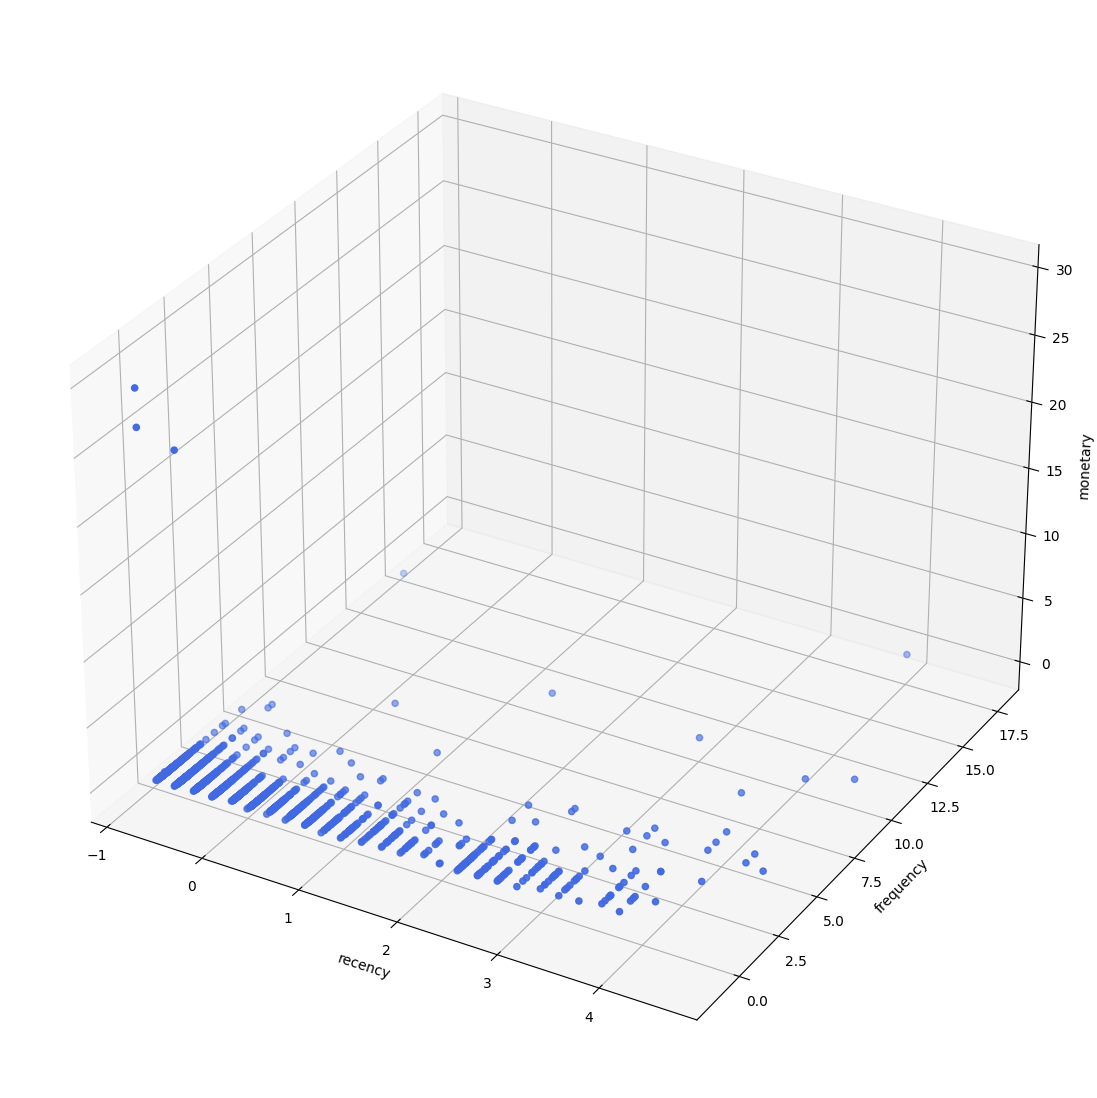

In [20]:
# define a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(14, 14)

# define the x, y, & z of our scatter plot, this will just be the data from our data frame.
x = list(scale_list[:,0])
y = list(scale_list[:,1])
z = list(scale_list[:,2])

# define the axis labels
column_names = scale_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the markers, and the color
ax.scatter(x, y, z, c='royalBlue', marker='o')

plt.show()


c:\Users\NgocHoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\NgocHoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\NgocHoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\NgocHoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

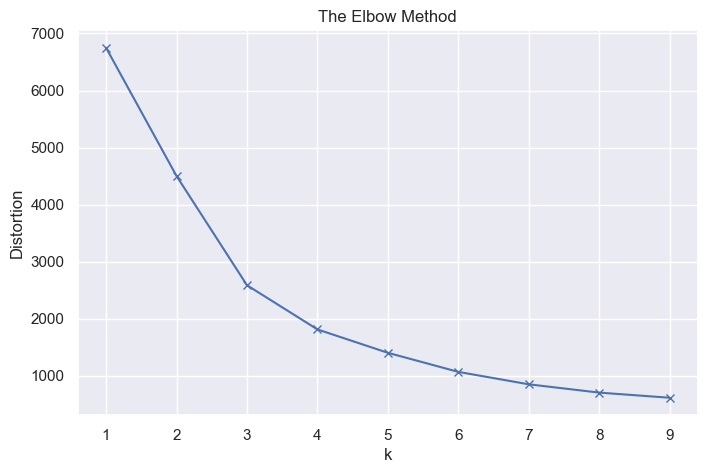

In [21]:
from sklearn.cluster import KMeans

sns.set_theme()

# assume X is your data
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scale_df.values)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

c:\Users\NgocHoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


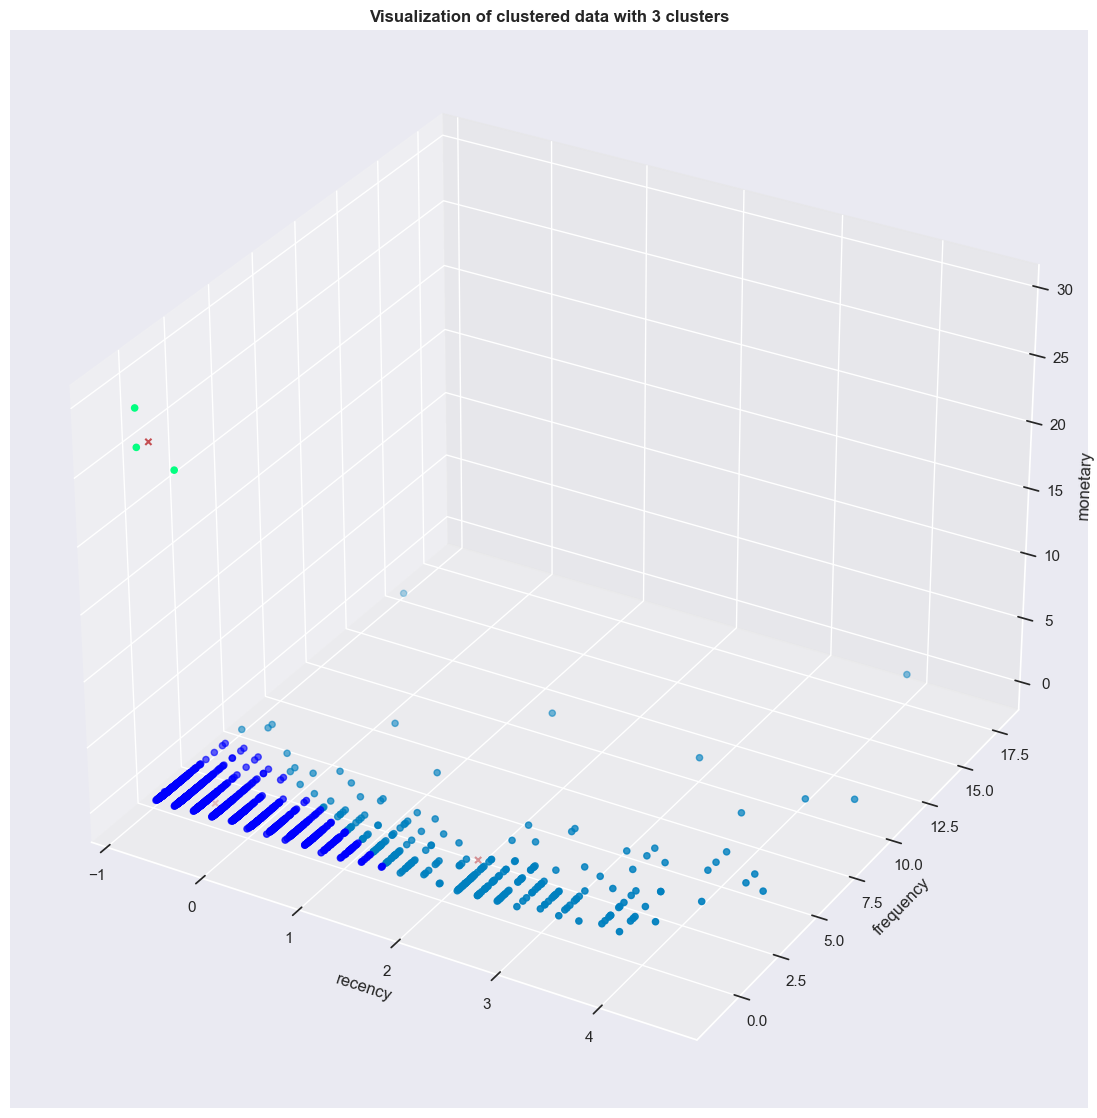

c:\Users\NgocHoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


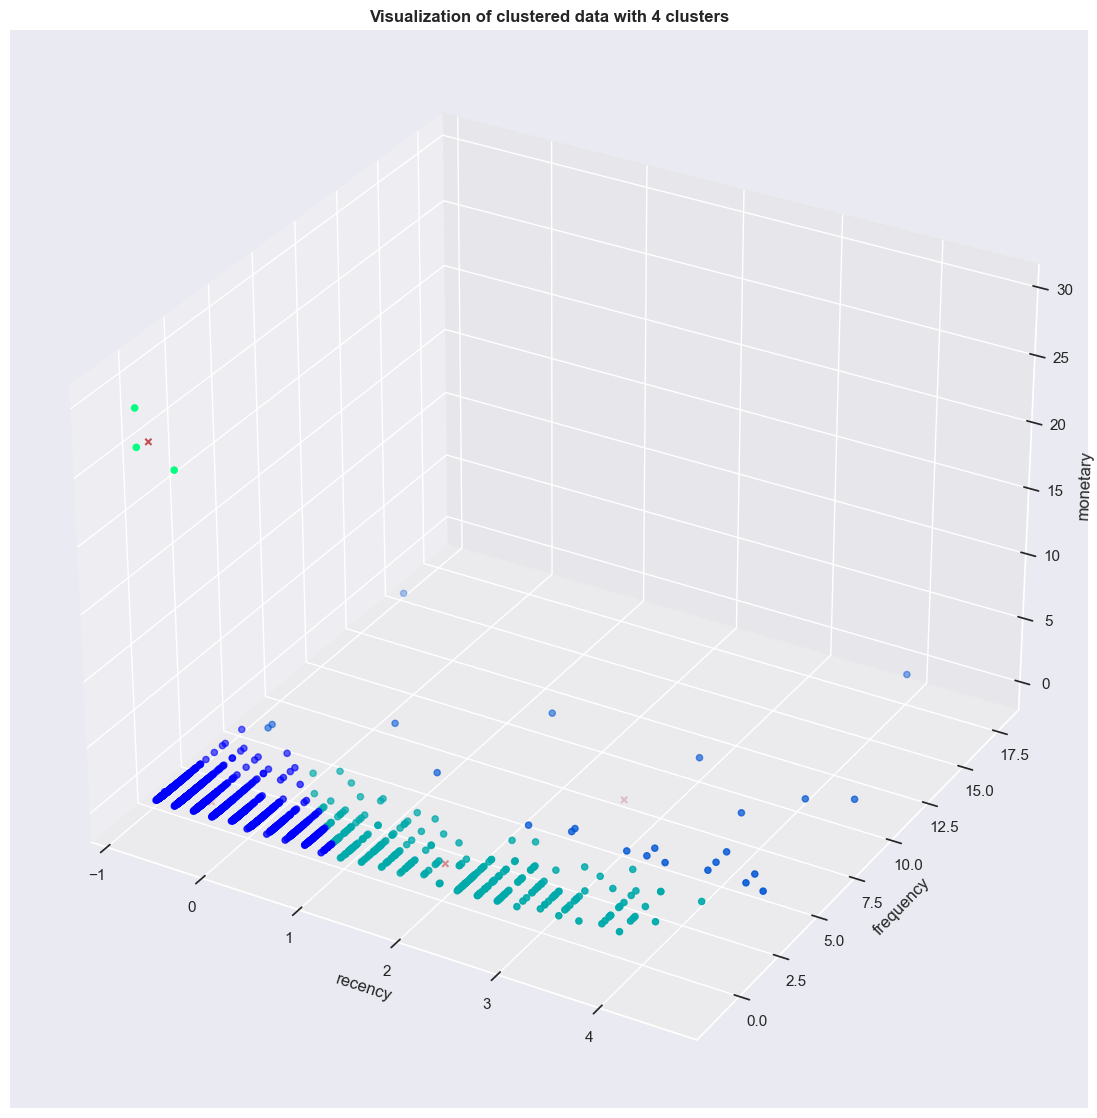

In [22]:
clusters = [3,4]

for cluster in clusters:
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(scale_list)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]
    


    # create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(14, 14)

    # take the scaled data in this example.
    x = scale_list[:,0]
    y = scale_list[:,1]
    z = scale_list[:,2]

    # define the axes labels
    column_names = scale_df.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    # create a new plot
    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='winter')
    ax.scatter(C1, C2, C3, marker="x", color='r')

    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')

    plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(scale_list)
df['group'] = kmeans.labels_
df.sort_values('group')

c:\Users\NgocHoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_id,recency,frequency,monetary,group
0,1,0,4.791209,333.00,0
1483,5682,0,9.500000,197.30,0
1482,5681,1,5.045977,628.75,0
1481,5680,1,6.138889,254.50,0
1479,5678,0,2.794326,829.90,0
...,...,...,...,...,...
587,588,9,7.842105,228.10,3
582,583,21,8.320755,229.60,3
1612,5811,14,5.789474,328.80,3
612,613,16,4.057143,541.50,3


In [26]:
df[df['recency']==0]

,customer_id,recency,frequency,monetary,group
0,1,0,4.791209,333.00,0
4,5,0,6.357143,276.00,0
9,10,0,3.549180,504.20,0
13,14,0,2.972414,483.70,0
20,21,0,7.533333,261.00,0
...,...,...,...,...,...
2233,8486,0,2.206349,808.35,0
2236,8489,0,2.310345,875.40,0
2243,8496,0,3.021429,664.00,0
2246,8499,0,3.111111,656.50,0


In [25]:
df[df['group']==0].describe()

,customer_id,recency,frequency,monetary,group
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.0
mean,4369.906250,2.270313,4.132518,598.350906,0.0
std,3129.845255,2.321559,2.115571,270.596365,0.0
min,1.000000,0.000000,0.997093,75.000000,0.0
25%,574.750000,0.000000,2.712198,407.450000,0.0
50%,5353.500000,1.000000,3.616026,557.000000,0.0
75%,5934.250000,4.000000,5.011364,749.762500,0.0
max,8501.000000,9.000000,19.565217,3308.400000,0.0


In [15]:
temp = pd.read_csv('rfm-cluster.csv')
temp

,customer_id,recency,frequency,monetary,log_recency,log_frequency,log_monetary,cluster_name
0,1,0,0.6891,333.00,0.000000,0.524196,5.811141,0
1,2,3,1.6387,1021.65,1.386294,0.970286,6.930153,2
2,3,5,1.7059,2082.15,1.791759,0.995435,7.641636,1
3,4,3,0.6050,314.75,1.386294,0.473124,5.754951,2
4,5,0,0.5966,276.00,0.000000,0.467876,5.624018,0
...,...,...,...,...,...,...,...,...
2245,8498,2,0.7899,457.50,1.098612,0.582160,6.127960,2
2246,8499,0,1.0252,656.50,0.000000,0.705668,6.488445,0
2247,8500,3,1.6303,1018.65,1.386294,0.967098,6.927215,2
2248,8501,1,0.5462,298.75,0.693147,0.435800,5.702949,2


In [28]:
temp[temp['cluster_name']==0].describe()

,customer_id,recency,frequency,monetary,log_recency,log_frequency,log_monetary,cluster_name
count,546.000000,546.0,546.000000,546.000000,546.0,546.000000,546.000000,546.0
mean,4792.945055,0.0,0.865622,591.075769,0.0,0.606163,6.270847,0.0
std,2749.578697,0.0,0.358519,295.168271,0.0,0.184995,0.489700,0.0
min,1.000000,0.0,0.075600,22.050000,0.0,0.072879,3.137666,0.0
25%,5002.250000,0.0,0.596600,387.100000,0.0,0.467876,5.961263,0.0
50%,5439.000000,0.0,0.806700,548.775000,0.0,0.591502,6.309509,0.0
75%,5874.500000,0.0,1.075600,735.612500,0.0,0.730250,6.602061,0.0
max,8499.000000,0.0,2.420200,3308.400000,0.0,1.229699,8.104522,0.0


In [29]:
temp[temp['cluster_name']==1].describe()

,customer_id,recency,frequency,monetary,log_recency,log_frequency,log_monetary,cluster_name
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.0
mean,3580.039024,10.804878,0.638451,446.185545,2.363970,0.479351,5.953858,1.0
std,2981.600043,5.637616,0.280793,248.824138,0.450318,0.169557,0.572406,0.0
min,3.000000,3.000000,0.058800,28.000000,1.386294,0.057136,3.367296,1.0
25%,457.500000,6.000000,0.420200,271.025000,1.945910,0.350798,5.605893,1.0
50%,5138.000000,9.000000,0.613400,407.300000,2.302585,0.478344,6.012002,1.0
75%,5661.500000,16.000000,0.819300,560.275000,2.833213,0.598449,6.330211,1.0
max,8490.000000,28.000000,1.705900,2082.150000,3.367296,0.995435,7.641636,1.0


In [30]:
temp[temp['cluster_name']==2].describe()

,customer_id,recency,frequency,monetary,log_recency,log_frequency,log_monetary,cluster_name
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.0
mean,4433.266114,2.317680,0.915170,616.653020,1.114242,0.633433,6.331933,2.0
std,3237.375299,1.446241,0.349576,258.027474,0.404353,0.180899,0.452938,0.0
min,2.000000,1.000000,0.159700,73.200000,0.693147,0.148161,4.306764,2.0
25%,564.750000,1.000000,0.655500,431.362500,0.693147,0.504103,6.069264,2.0
50%,5395.500000,2.000000,0.890800,589.400000,1.098612,0.637000,6.380800,2.0
75%,8068.500000,3.000000,1.134500,769.725000,1.386294,0.758232,6.647332,2.0
max,8501.000000,10.000000,2.252100,1759.950000,2.397895,1.179301,7.473609,2.0


In [31]:
temp[temp['cluster_name']==3].describe()

,customer_id,recency,frequency,monetary,log_recency,log_frequency,log_monetary,cluster_name
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,5200.000000,0.666667,506.033633,439799.220000,0.366204,6.223126,12.992456,3.0
std,3862.641583,1.154701,63.821611,30951.580403,0.634284,0.128877,0.069376,0.0
min,1000.000000,0.000000,436.882400,415494.180000,0.000000,6.081950,12.937226,3.0
25%,3500.000000,0.000000,477.714300,422376.715000,0.000000,6.167453,12.953522,3.0
50%,6000.000000,0.000000,518.546200,429259.250000,0.000000,6.252956,12.969819,3.0
75%,7300.000000,1.000000,540.609250,451951.740000,0.549306,6.293714,13.020071,3.0
max,8600.000000,2.000000,562.672300,474644.230000,1.098612,6.334473,13.070323,3.0
